<a href="https://colab.research.google.com/github/Aniverthy/K-Means-Clustering/blob/main/MAJOR_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2.MAJOR PROJECT 2
# Create any of the Image Processing Projects using Numpy and OpenCV.(Projects done in the class are not accepted)
# (One can use the haarcasacde models if necessary)

#                                          (OR)
# Choose any dataset of your choice and apply K Means Clustering .

In [333]:
#We CREATE OUR OWN DATASET
import numpy as np
experience = np.random.randint(35,65,100)#It will print numbers from 1 to 101
np.random.seed(35)
#random.seed keep my values constant
salary = np.random.randint(20000,100000,100)
salary = np.sort(salary)
print(experience)
print(salary)

[61 46 49 50 35 48 39 62 50 37 56 35 58 50 40 59 53 35 57 51 47 59 35 57
 39 51 42 64 42 54 45 51 54 42 50 43 43 41 62 61 62 48 40 47 64 47 48 40
 54 40 54 51 64 60 37 61 64 41 48 63 57 47 39 39 38 55 49 46 48 41 49 39
 40 37 56 42 60 54 43 62 41 50 52 64 41 57 52 36 58 49 47 59 49 56 53 59
 63 44 63 61]
[20564 21742 21946 22636 23203 24863 24888 25165 25267 25387 26845 27225
 27404 30827 32304 32472 33661 35004 35277 35397 36068 36250 36361 38873
 39128 39485 39705 39972 40058 40268 41589 41731 41911 42067 42636 42747
 44242 45051 45918 46003 47605 48844 48871 49053 51550 52628 55560 55694
 56068 57086 58168 58435 58441 60943 61490 61911 62226 62394 63260 65702
 65943 66236 66250 66941 67276 67670 68161 68763 70848 70850 71831 72674
 74494 75215 76300 77392 78589 80271 80680 85502 87427 87454 87536 87537
 90203 90518 91369 91389 92255 93389 94935 95826 96494 96949 97719 98277
 98335 98682 99499 99672]


In [334]:
type(experience)

numpy.ndarray

In [335]:
#creating datframe
import pandas as pd
df=pd.DataFrame()

In [336]:
df["experience"]=experience
df["salary"]=salary

In [337]:
df

,experience,salary
0,61,20564
1,46,21742
2,49,21946
3,50,22636
4,35,23203
...,...,...
95,59,98277
96,63,98335
97,44,98682
98,63,99499


In [338]:
#input
x=df.values


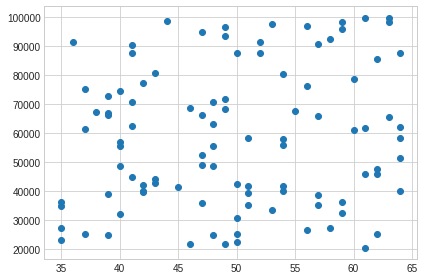

In [339]:
#3.VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df["experience"],df["salary"])

In [340]:
#Here our main task is to find out the number of clusters(k)
import numpy as np
np.sqrt(100) # 100 is the total no of points
#No of cluster - k
#k value should not exceed the square root of the total no of points
#Hence k value should be in the range of 2 to 100

10.0

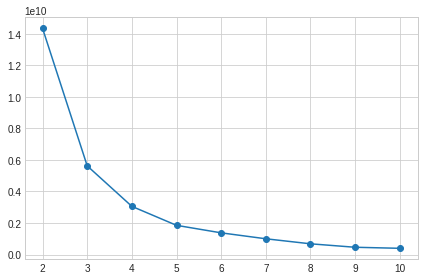

In [341]:
#1.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,11)# my range is in between 2 and 10

sse = [] #blank list

#for i in range(2,11):
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

In [342]:
#We will now consider the point at which the eblow is more prominent(projecting from something)
# We will consider k as 3 for now , but we are not sure

2 Clusters ,Score = 0.619633346345987
3 Clusters ,Score = 0.6369623468688296
4 Clusters ,Score = 0.6163650615811903
5 Clusters ,Score = 0.6027022890668868
6 Clusters ,Score = 0.5753985545398819
7 Clusters ,Score = 0.5700147619700908
8 Clusters ,Score = 0.5878876635228644
9 Clusters ,Score = 0.6186684995266593
10 Clusters ,Score = 0.6054506522301313


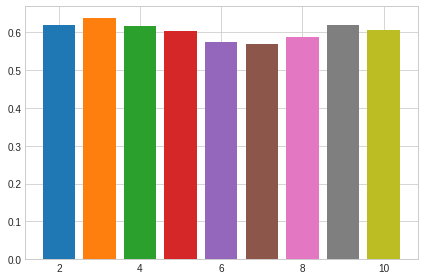

In [343]:
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,11)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))

In [344]:
#CONFIRMATION : THE No OF CLUSTERS TO BE CONSIDERED IS 3.

In [345]:
#7.APPLY CLUSTERER
k = 3
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=3, random_state=0)

In [346]:
y = model.predict(x) # predicted output
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [347]:
y.size

100

In [348]:
np.unique(y,return_counts = True)

(array([0, 1, 2], dtype=int32), array([33, 44, 23]))

In [349]:
x[y == 1,1]
#so the first '1' is cluster no 1 and the second '1' is column index 1 
#the value of input,when cluster 1 is selected and column index 1 selected

array([20564, 21742, 21946, 22636, 23203, 24863, 24888, 25165, 25267,
       25387, 26845, 27225, 27404, 30827, 32304, 32472, 33661, 35004,
       35277, 35397, 36068, 36250, 36361, 38873, 39128, 39485, 39705,
       39972, 40058, 40268, 41589, 41731, 41911, 42067, 42636, 42747,
       44242, 45051, 45918, 46003, 47605, 48844, 48871, 49053])

In [350]:
np.unique(y,return_counts = True)

(array([0, 1, 2], dtype=int32), array([33, 44, 23]))

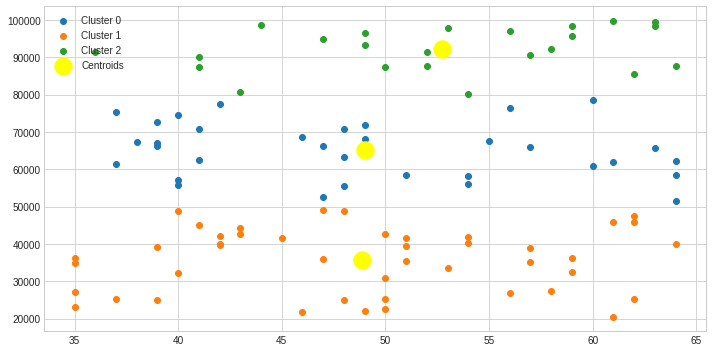

In [351]:
#FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,c = 'yellow',
            label = 'Centroids')
plt.legend()